In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [47]:
df = pd.read_csv('/content/Fish.csv')
df.head(10)

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
5   Bream   450.0     26.8     29.7     34.7  13.6024  4.9274
6   Bream   500.0     26.8     29.7     34.5  14.1795  5.2785
7   Bream   390.0     27.6     30.0     35.0  12.6700  4.6900
8   Bream   450.0     27.6     30.0     35.1  14.0049  4.8438
9   Bream   500.0     28.5     30.7     36.2  14.2266  4.9594

In [48]:
# get the values of a single column into a pandas Series
column = df['Weight']

# calculate the mean
mean = column.mean()

# calculate the median
median = column.median()

# calculate the mode
mode = column.mode()

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")

Mean: 398.3264150943396
Median: 273.0
Mode: 0    300.0
Name: Weight, dtype: float64


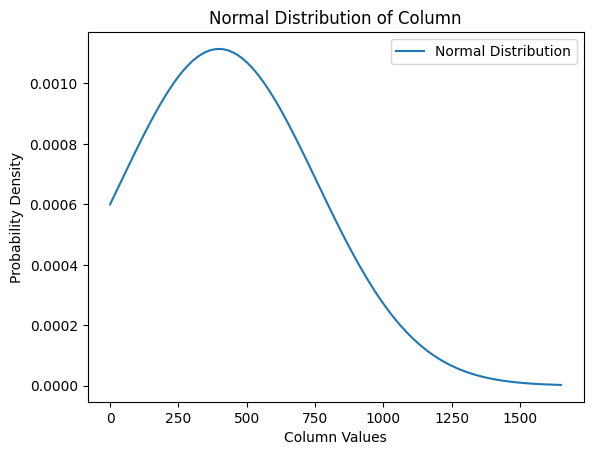

In [49]:
# Calculate the mean and standard deviation of the selected column
std_dev = column.std()

# Create a normal distribution object with the same mean and standard deviation
dist = stats.norm(mean, std_dev)

# Generate 100 values between the minimum and maximum values in the column
x = pd.Series(data=np.linspace(column.min(), column.max(), 100))

# Calculate the probability density function (PDF) for each value in x
pdf = dist.pdf(x)

# Create a plot of the PDF
fig, ax = plt.subplots()
ax.plot(x, pdf, label='Normal Distribution')

# Add labels and a legend to the plot
ax.set_xlabel('Column Values')
ax.set_ylabel('Probability Density')
ax.set_title('Normal Distribution of Column')
ax.legend()

# Show the plot
plt.show()

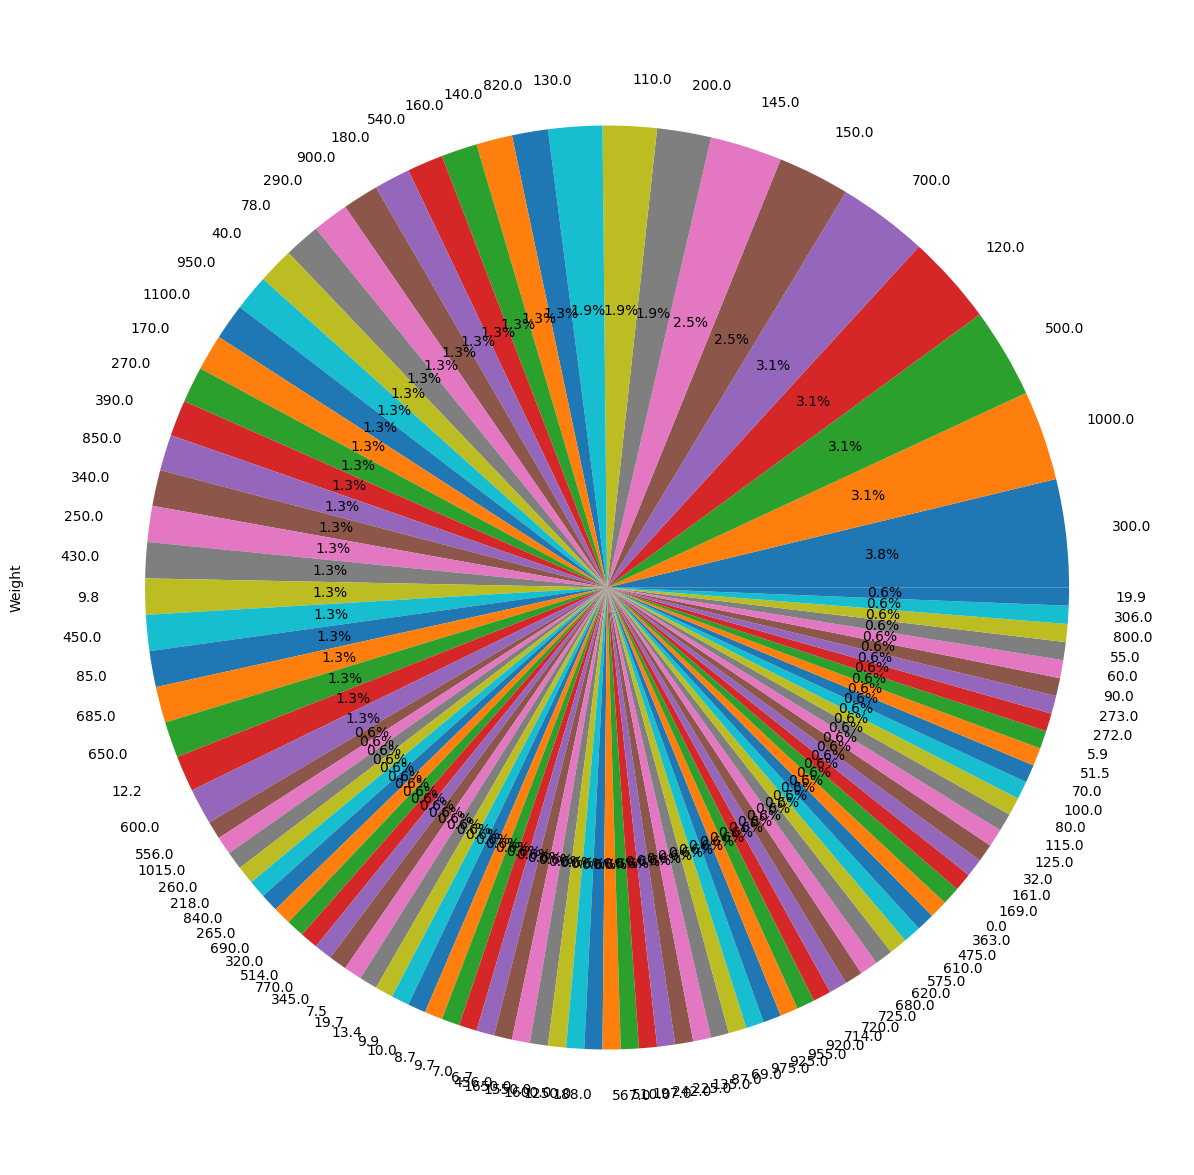

In [50]:
# Count the occurrences of each value in the column
value_counts = column.value_counts()

# Create a bigger pie chart of the value counts
plt.figure(figsize=(15, 15)) # Set the figure size to 8 inches by 8 inches
value_counts.plot(kind='pie', autopct='%1.1f%%')

# Show the pie chart
plt.show()


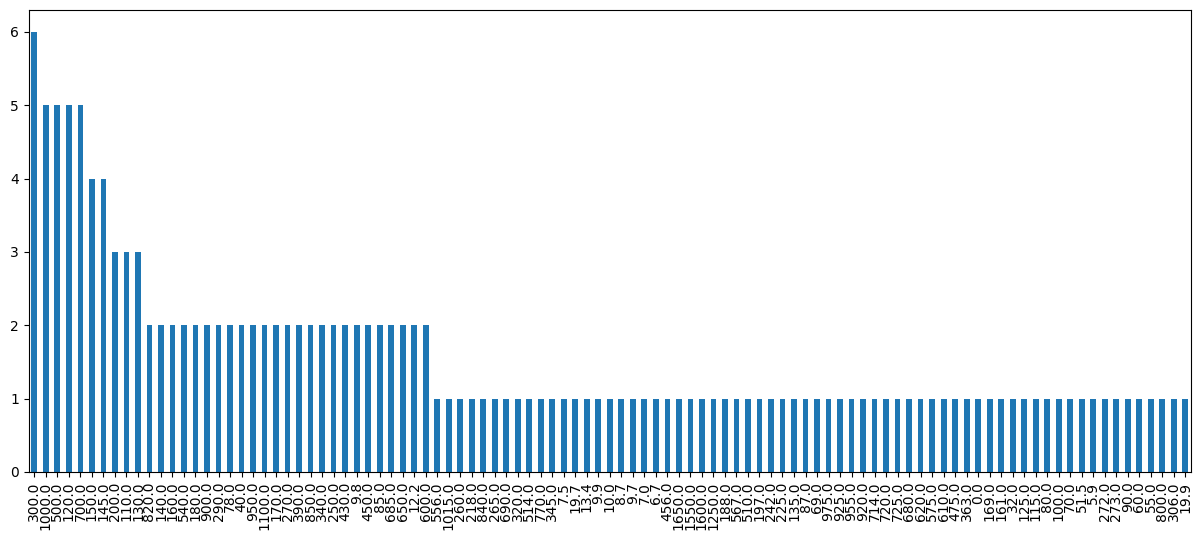

In [51]:

# Create a bigger bar chart of the value counts
plt.figure(figsize=(15, 6)) # Set the figure size to 12 inches by 6 inches
value_counts.plot(kind='bar')

# Show the bar chart
plt.show()

**Linear regression**

In [52]:
df.describe
df.info

<bound method DataFrame.info of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


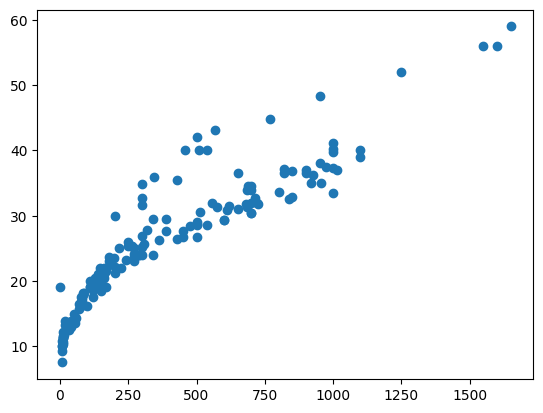

In [53]:
#Setup for initial table
print(df.head())

x_axis_weight = df['Weight'].values
y_axis_length1 = df['Length1'].values
y_axis_length2 = df['Length2'].values
y_axis_length3 = df['Length3'].values

plt.scatter(x_axis_weight, y_axis_length1)
plt.show()

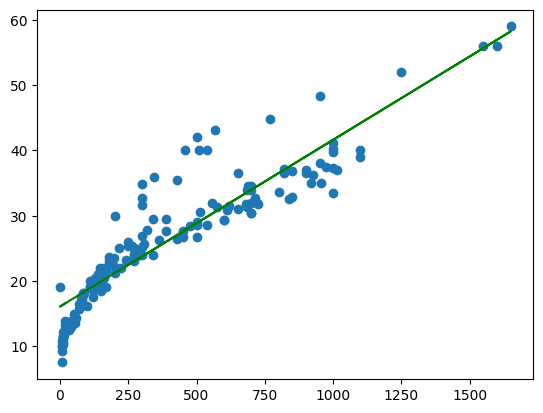

In [57]:
#Plotting our line

x_axis_weight = x_axis_weight.reshape(-1, 1)
# print(x_axis_weight)
# print(x_axis_weight.shape)
model = LinearRegression().fit(x_axis_weight, y_axis_length1)

prediction = model.predict(x_axis_weight)

plt.scatter(x_axis_weight, y_axis_length1)
plt.plot(x_axis_weight, prediction, color="green")
plt.show()